### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [12]:
data = pd.read_csv('data/coupons.csv')

In [13]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

2. Investigate the dataset for missing or problematic data.

In [96]:
def check_missing_data(df):
    missing_summary = df.isnull().sum()
    missing_percent = (missing_summary / len(df)) * 100
    return pd.DataFrame({"Missing Values in the file Coupons.csv -> ": missing_summary, "%": missing_percent})

missing_data = check_missing_data(data)
print("\n summary missing values:")
print(missing_data)

# Looking for any duplicated rows in the data set ...  
duplicate_rows = data.duplicated().sum()
print(f"\n my duplicated rows: {duplicate_rows}")

# issues like unexpected or inconsistent categories
def check_unique_values(df):
    unique_summary = {col: df[col].unique() for col in df.columns if df[col].dtype == 'object'}
    return unique_summary

unique_values = check_unique_values(data)
print("\nUnique values in categorical columns:")
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique Values: {values[:10]}")
    if len(values) > 10:
        print("... (and more)")
    print("-")

# Detect any numerical columns with issues
def check_numerical_anomalies(df):
    anomalies = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        if (df[col] < 0).any():
            anomalies[col] = "Contains negative values"
        elif df[col].isnull().all():
            anomalies[col] = "All values are missing"
    return anomalies

numerical_anomalies = check_numerical_anomalies(data)
print("\nNumerical column anomalies:")
for col, issue in numerical_anomalies.items():
    print(f"{col}: {issue}")

# Final Summary 
print("\nDataset shape -> :", data.shape)
print("-- Column data types :")
print(data.dtypes)


 summary missing values:
                                  Missing Values in the file Coupons.csv ->   \
destination                                                                0   
passanger                                                                  0   
weather                                                                    0   
temperature                                                                0   
time                                                                       0   
coupon                                                                     0   
expiration                                                                 0   
gender                                                                     0   
age                                                                        0   
maritalStatus                                                              0   
has_children                                                               0   
education     

3. Decide what to do about your missing data -- drop, replace, other...

In [23]:
def check_missing_data(df):
    missing_summary = df.isnull().sum()
    missing_percent = (missing_summary / len(df)) * 100
    return pd.DataFrame({"Missing Values": missing_summary, "Percentage": missing_percent})

missing_data = check_missing_data(data)
print("\nSummary of missing data:")
print(missing_data)

# Save missing data summary to my text file
missing_data_file = '/Users/pablorivera/PabloCoupon/missing_data_summary.txt'
with open(missing_data_file, 'w') as file:
    file.write("Summary of missing data:\n")
    file.write(missing_data.to_string())
print(f"Missing data summary saved to {missing_data_file}")

# Handle missing data
# 1. Numerical columns: check for issues
rows_changed = []
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    if data[col].isnull().sum() > 0:
        missing_indices = data[data[col].isnull()].index.tolist()
        rows_changed.extend([(index, col) for index in missing_indices])
        for index in missing_indices:
            print(f"Imputing missing value at Row: {index}, Column: {col}")
        data[col].fillna(data[col].mean(), inplace=True)

# Save rows changed to a text file
rows_changed_file = '/Users/pablorivera/PabloCoupon/rows_changed_with_mean.txt'
with open(rows_changed_file, 'w') as file:
    file.write("Rows and columns changed with mean imputation:\n")
    for row, column in rows_changed:
        file.write(f"Row: {row}, Column: {column}\n")
print(f"Rows changed with mean saved to {rows_changed_file}")

# 2. Category columns: Impute with mode and log changes
columns_changed = []
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        missing_indices = data[data[col].isnull()].index.tolist()
        columns_changed.extend([(index, col) for index in missing_indices])
        for index in missing_indices:
            print(f"Imputing missing value at Row: {index}, Column: {col}")
        data[col].fillna(data[col].mode()[0], inplace=True)

# Save to a text file
columns_changed_file = '/Users/pablorivera/PabloCoupon/columns_changed_with_mode.txt'
with open(columns_changed_file, 'w') as file:
    file.write("Rows and columns changed with mode imputation:\n")
    for row, column in columns_changed:
        file.write(f"Row: {row}, Column: {column}\n")
print(f"Columns changed with mode saved to {columns_changed_file}")


# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")
# I need to remove the duplicated values 
data = data.drop_duplicates()
print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")



Summary of missing data:
                      Missing Values  Percentage
destination                        0         0.0
passanger                          0         0.0
weather                            0         0.0
temperature                        0         0.0
time                               0         0.0
coupon                             0         0.0
expiration                         0         0.0
gender                             0         0.0
age                                0         0.0
maritalStatus                      0         0.0
has_children                       0         0.0
education                          0         0.0
occupation                         0         0.0
income                             0         0.0
car                                0         0.0
Bar                                0         0.0
CoffeeHouse                        0         0.0
CarryAway                          0         0.0
RestaurantLessThan20               0       

4. What proportion of the total observations chose to accept the coupon?



In [76]:
acceptance_rate = data['Y'].mean()
print(f"\nProportion of total observations that accepted the coupon: {acceptance_rate:.2%}")


Proportion of total observations that accepted the coupon: 57.46%


5. Use a bar plot to visualize the `coupon` column.

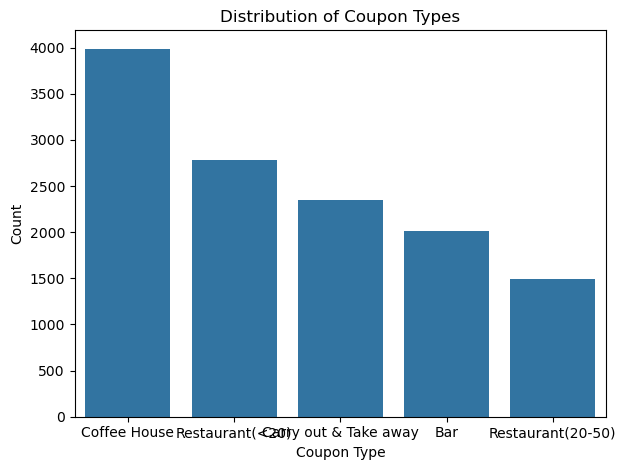

In [29]:
sns.countplot(data=data, x='coupon', order=data['coupon'].value_counts().index)
plt.title("Distribution of Coupon Types")
plt.xlabel("Type of Coupon")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


6. Use a histogram to visualize the temperature column.

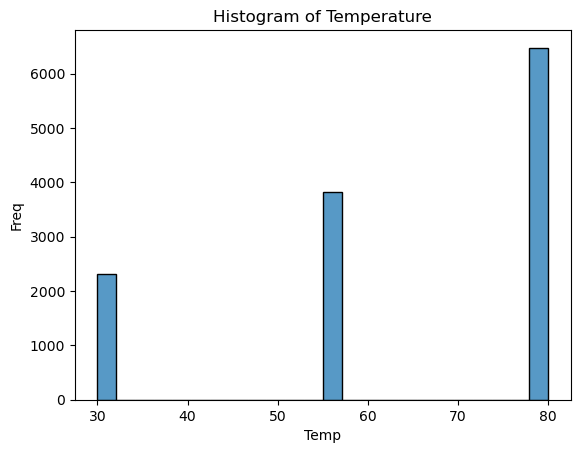

In [34]:
sns.histplot(data=data, x='temperature')
plt.title("Histogram of Temperature")
plt.xlabel("Temp")
plt.ylabel("Freq")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [36]:
bar_coupons_df = data[data['coupon'] == 'Bar']
print(f"\nDataFrame with only bar coupons created. Number of rows: {len(bar_coupons_df)}")


DataFrame with only bar coupons created. Number of rows: 2010


2. What proportion of bar coupons were accepted?


In [42]:
if 'Y' in bar_coupons_df.columns:
    bar_coupons_acceptance_rate = bar_coupons_df['Y'].mean()
    print(f"Proportion of bar coupons accepted: {bar_coupons_acceptance_rate:.2%}")

Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [79]:
My_array_help_visit = { 'never': '3 or fewer', 
                'less1': '3 or fewer',
                '1~3': '3 or fewer',
                '4~8': 'More than 3',
                'gt8': 'More than 3'}
bar_coupons_df.loc[:,'Bar_visits_group'] = bar_coupons_df['Bar'].map(My_array_help_visit)
tmp_acceptance_rate_by_group = bar_coupons_df.groupby('Bar_visits_group')['Y'].mean()
print("\nAcceptance rates bar visit freq:")   
print(tmp_acceptance_rate_by_group)



Acceptance rates bar visit freq:
Bar_visits_group
3 or fewer     0.370514
More than 3    0.768844
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [84]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')   ## force to numeric 
data = data.dropna(subset=['age'])## remove invalid rows 

helper_visit = {
        'never': 0,
        'less1': 0,
        '1~3': 1,
        '4~8': 1,
        'gt8': 1
    }
data['Bar_more_than_once'] = data['Bar'].map(helper_visit)
myTMPgroupA = data.loc[(data['Bar_more_than_once'] == 1) & (data['age'] > 25)]
myTMPgroupB = data.loc[~((data['Bar_more_than_once'] == 1) & (data['age'] > 25))]
myTMPgroupA_acceptance = myTMPgroupA['Y'].mean() 
myTMPgroupB_acceptance = myTMPgroupB['Y'].mean() 
print("\nAcceptance Comp:-> ")
print(f"Drivers going to bar > than once a month and > 25: {myTMPgroupA_acceptance:.2%}")
print(f"All other drivers: {myTMPgroupB_acceptance:.2%}")


Acceptance Comp:-> 
Drivers going to bar > than once a month and > 25: 62.43%
All other drivers: 55.99%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [86]:
visit_mapping = {
        'never': 0,
        'less1': 0,
        '1~3': 1,
        '4~8': 1,
        'gt8': 1
}
data['Bar_more_than_once'] = data['Bar'].map(visit_mapping)
groupA = data.loc[(data['Bar_more_than_once'] == 1) &
                      (data['passanger'] != 'Kid(s)') &
                      (~data['occupation'].isin(['Farming', 'Fishing', 'Forestry']))]
groupB = data.loc[~((data['Bar_more_than_once'] == 1) &
                        (data['passanger'] != 'Kid(s)') &
                        (~data['occupation'].isin(['Farming', 'Fishing', 'Forestry'])))]

groupA_acceptance = groupA['Y'].mean() 
groupB_acceptance = groupB['Y'].mean() 
print("\nAcceptance rate comparison:")
print(f"Drivers that go to bar > once a month, and have passengers <> kids, and occupations <> farming, fishing, or forestry: {group1_acceptance:.2%}")
print(f"All other drivers: {groupB_acceptance:.2%}")


Acceptance rate comparison:
Drivers that go to bar > once a month, and have passengers <> kids, and occupations <> farming, fishing, or forestry: 62.43%
All other drivers: 55.08%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [91]:
if all(col in data.columns for col in ['Bar', 'passanger', 'maritalStatus', 'age', 'RestaurantLessThan20', 'income']):
    visit_classification = {
        'never': 0,
        'less1': 0,
        '1~3': 1,
        '4~8': 1,
        'gt8': 1
    }
    data['Bar_more_than_onetime'] = data['Bar'].map(visit_classification)
    # (a) Go to bars more than 1 a month, had passengers that were not kids, and were not widowed
    condition1 = (data['Bar_more_than_onetime'] == 1) & (data['passanger'] != 'Kid(s)') & (data['maritalStatus'] != 'Widowed')
    # (b) Go to bars more than 1 a month and are under the age of 30
    condition2 = (data['Bar_more_than_onetime'] == 1) & (pd.to_numeric(data['age'], errors='coerce') < 30)
    # (c) Go to restaurent > 4 times per month and income < than 50K
    restaurant_freq = {
        'never': 0,
        'less1': 0,
        '1~3': 0,
        '4~8': 1,
        'gt8': 1
    }
    data['RestaurantLessThan20_more_than_4'] = data['RestaurantLessThan20'].map(restaurant_freq)
    income_mapping = {
        'Less than $12500': 1,
        '$12500 - $24999': 1,
        '$25000 - $37499': 1,
        '$37500 - $49999': 1,
        '$50000 - $62499': 0,
        '$62500 - $74999': 0,
        '$75000 - $87499': 0,
        '$87500 - $99999': 0,
        '$100000 or More': 0
    }
    data['income_less_than_50K'] = data['income'].map(income_mapping)
    condition3 = (data['RestaurantLessThan20_more_than_4'] == 1) & (data['income_less_than_50K'] == 1)
    TMPgroupA = data.loc[condition1 | condition2 | condition3]
    TMPgroupB = data.loc[~(condition1 | condition2 | condition3)]
    TMPgroupA_acceptance = TMPgroupA['Y'].mean() 
    TMPgroupB_acceptance = TMPgroupB['Y'].mean() 
    print("\nAcceptance rate comp:")
    print(f"Drivers al least 1 od cond: {groupA_acceptance:.1%}")
    print(f"All other drivers: {groupB_acceptance:.1%}")
else:
    print("\nRequired columns are not found in the dataset. Unable to compare acceptance rates.")




Acceptance rate comp:
Drivers al least 1 od cond: 62.6%
All other drivers: 55.1%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers visiting bars > once a month have a higher acceptance rates.  Also Drivers with passengers other than kids are more likely to accept bar coupons. Drivers with lower incomes (below $50K) those who frequently dine at cheap restaurants (more than 4 times a month) are more receptive to bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Proportion of the Coffee Hosue coupons accepted 

In [92]:
tmp_coffee_house_coupons = data.loc[data['coupon'] == 'Coffee House']
coffee_house_acceptance_rate = tmp_coffee_house_coupons['Y'].mean() 
print(f"Prop Coffee House coupons accepted: {coffee_house_acceptance_rate:.2%}")

Proportion of Coffee House coupons accepted: 50.23%


What is the best combination of gender, maritalStatus, and education is more willing to accept coffee House coupons ? 

In [95]:
tmp_coffee_house_coupons = data.loc[data['coupon'] == 'Coffee House']
coffee_house_acceptance_rate = tmp_coffee_house_coupons['Y'].mean() 
print(f"Prop CH coupons accepted: {coffee_house_acceptance_rate:.2%}")
# My Best combination of gender, maritalStatus, and education for Coffee House coupons
grouped = tmp_coffee_house_coupons.groupby(['gender', 'maritalStatus', 'education'])['Y'].mean()
My_best_combination = grouped.idxmax()
My_best_acceptance_rate = grouped.max()
print(f"Best combination of gender, maritalStatus, and education: {My_best_combination}")
print(f"Acceptance rate for this combination: {My_best_acceptance_rate:.2%}")

Prop CH coupons accepted: 50.23%
Best combination of gender, maritalStatus, and education: ('Male', 'Divorced', 'Some college - no degree')
Acceptance rate for this combination: 87.50%
